### Using yahooFinance and pandas_datareader function I have extracted the BTC-USD data from 01/01/2018 to 31/01/2022

In [1]:
!pip install pandas_datareader

In [2]:
!pip install yfinance

In [3]:
from pandas_datareader import data as pdr
# from datetime import datetime,date

import yfinance as yf
yf.pdr_override()

from datetime import datetime
startdate = datetime(2018,1,1)
enddate = datetime(2022,2,1)

data = pdr.get_data_yahoo('BTC-USD', start=startdate, end=enddate)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
2022-01-28,37128.445312,37952.878906,36211.109375,37784.332031,37784.332031,22238830523
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075


<AxesSubplot: title={'center': 'Open Price'}, xlabel='Date'>

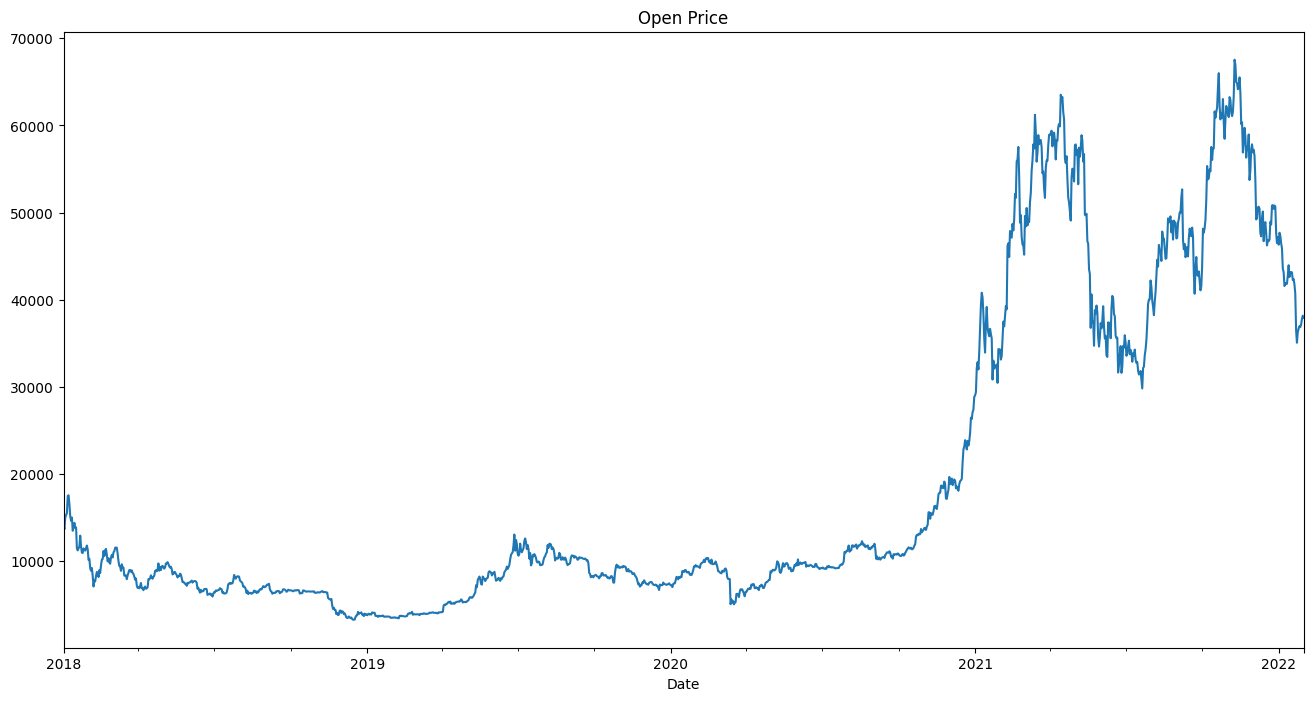

In [5]:
data['Open'].plot(label='BTC/USTD',figsize=(16,8),title='Open Price')

<AxesSubplot: title={'center': 'Volume'}, xlabel='Date'>

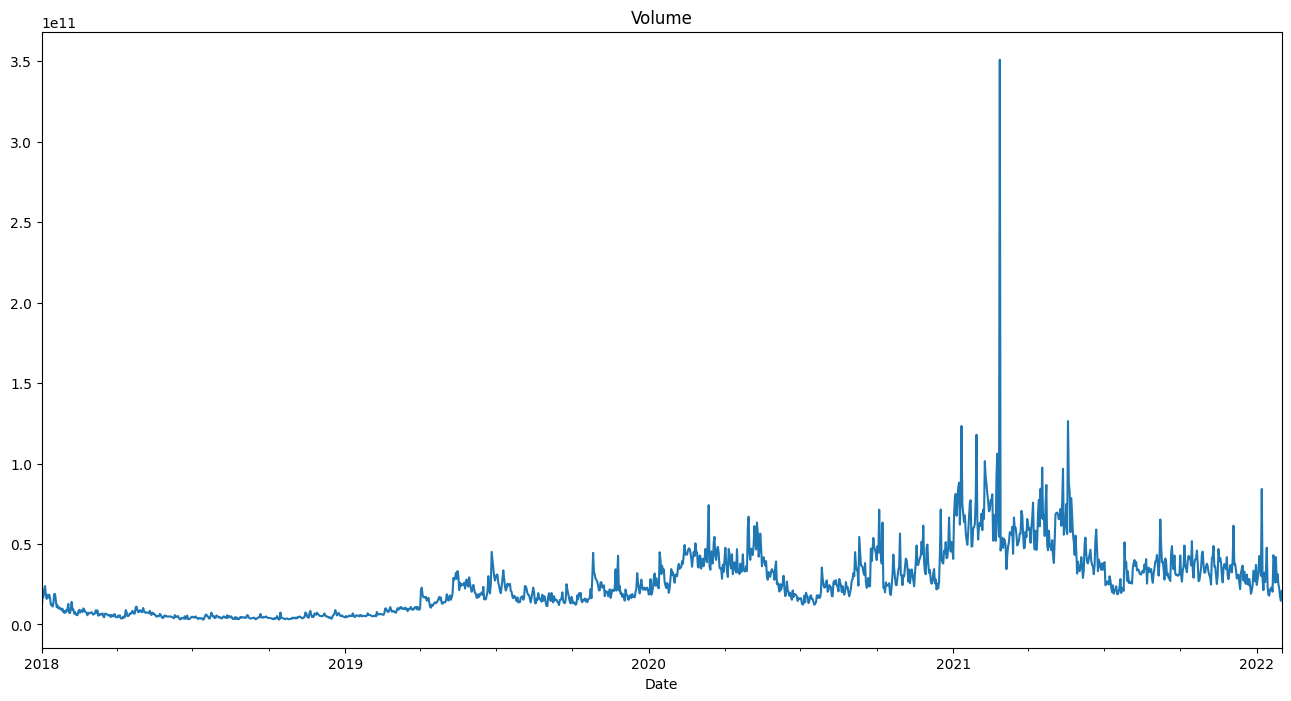

In [6]:
data['Volume'].plot(label='BTC/USTD',figsize=(16,8),title='Volume')

In [7]:
data['Total Traded'] = data['Open']*data['Volume']

<AxesSubplot: title={'center': 'Total Traded'}, xlabel='Date'>

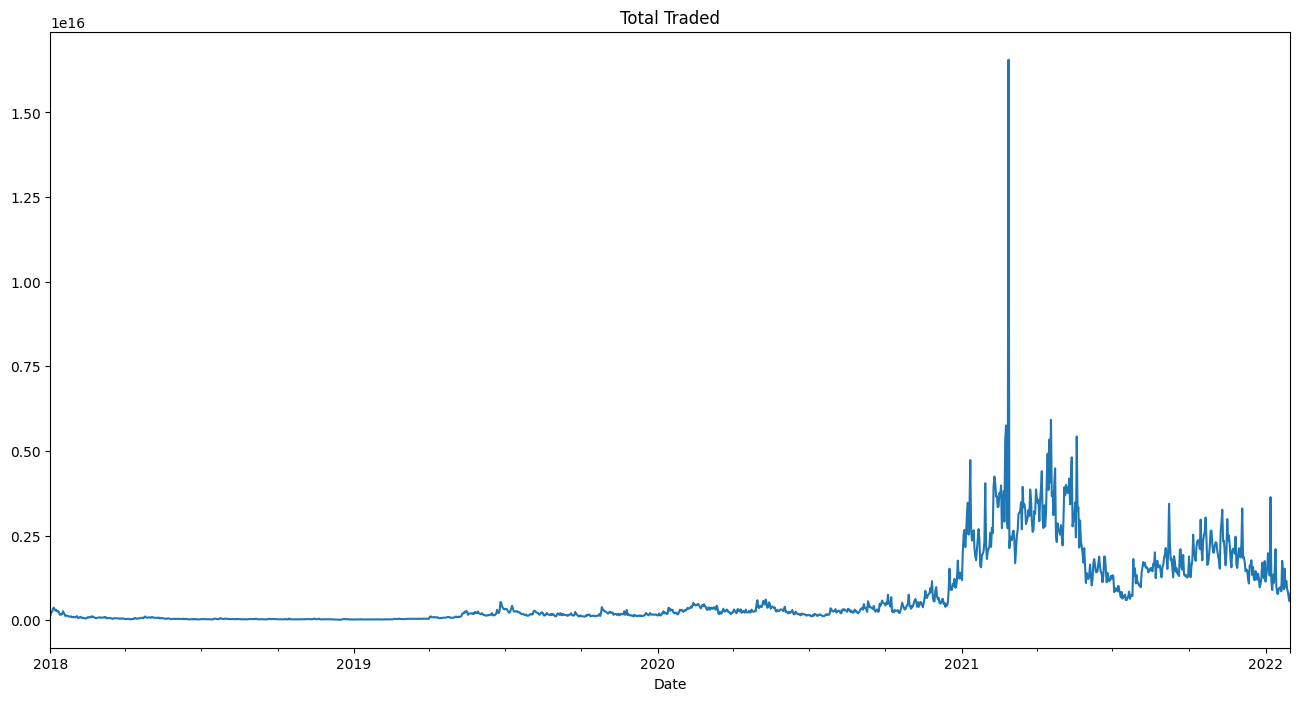

In [8]:
data['Total Traded'].plot(label='Total Traded',figsize=(16,8) , title= "Total Traded")

<AxesSubplot: title={'center': 'MA50/MA200'}, xlabel='Date'>

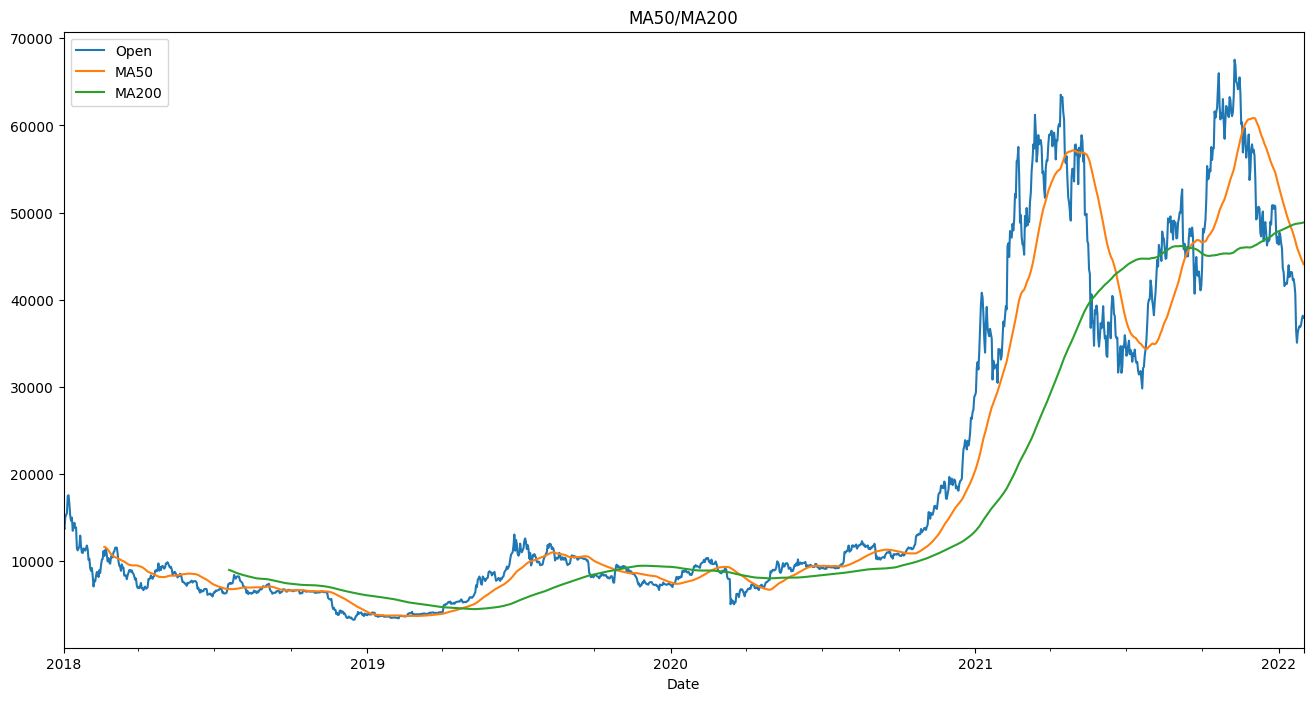

In [9]:
data['MA50'] = data['Open'].rolling(50).mean()
data['MA200'] = data['Open'].rolling(200).mean()
data[['Open','MA50','MA200']].plot(label='BTC/USDT',figsize=(16,8), title="MA50/MA200")

# Daily Percentage Change

First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:
    
returns = (price at T/price at T-1) -1

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [10]:
data['returns'] = (data['Close'] / data['Close'].shift(1) ) - 1
data.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,1.452315e+14,NaN,NaN,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,2.295349e+14,NaN,NaN,0.097011
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,2.527107e+14,NaN,NaN,0.014611
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,3.326447e+14,NaN,NaN,0.026196
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,3.689904e+14,NaN,NaN,0.117333


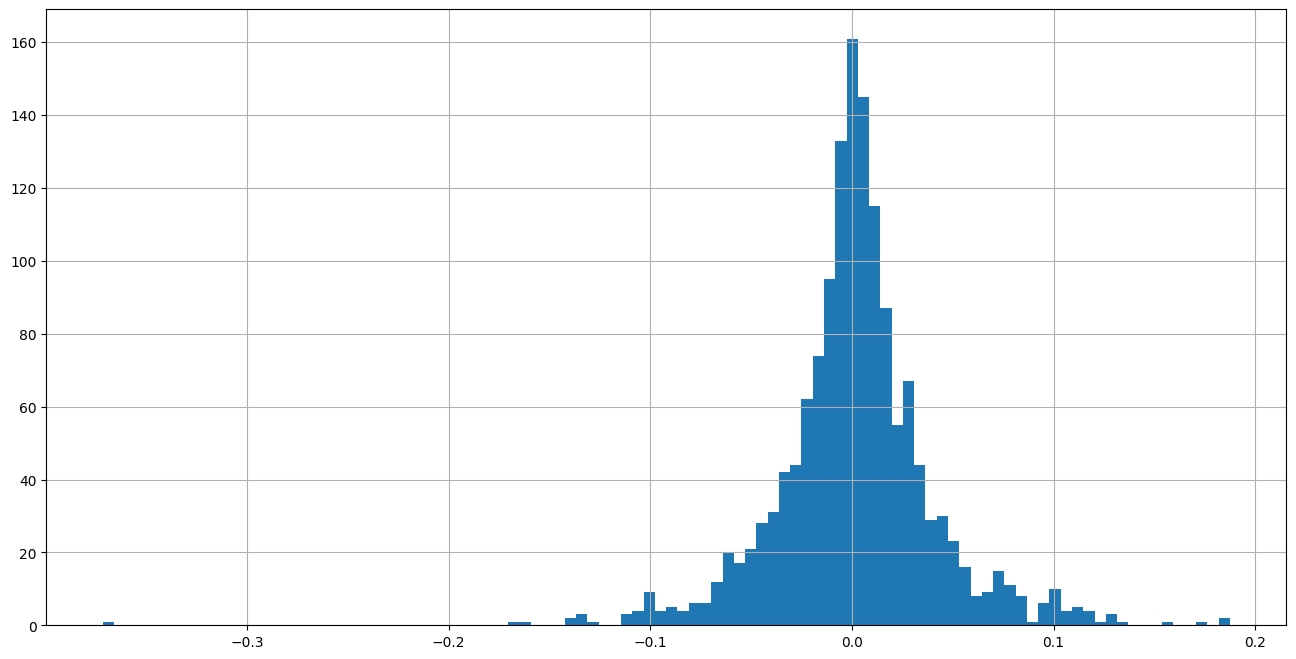

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
data['returns'].hist(bins=100)
plt.show()

<AxesSubplot: ylabel='Density'>

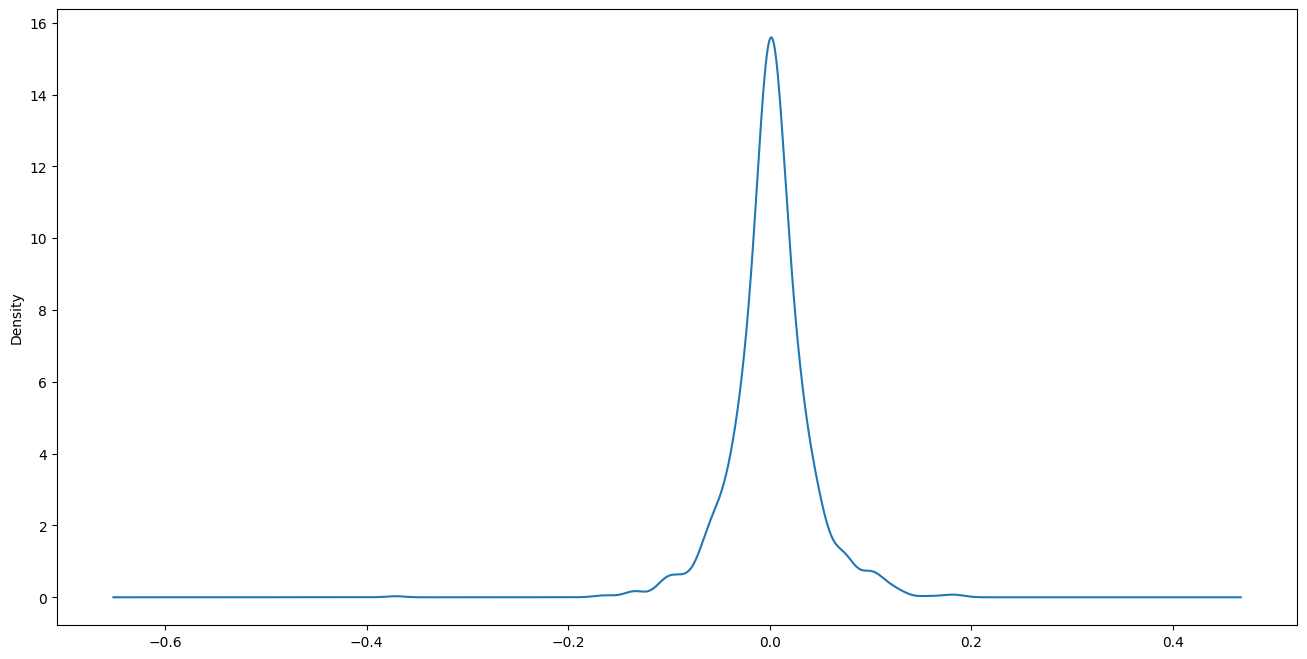

In [12]:
data['returns'].plot(kind='kde',label='BTC/USDT',figsize=(16,8))

In [13]:
data['Cumulative Return'] = (1 + data['returns']).cumprod()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,1.452315e+14,NaN,NaN,NaN,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,2.295349e+14,NaN,NaN,0.097011,1.097011
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,2.527107e+14,NaN,NaN,0.014611,1.113039
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,3.326447e+14,NaN,NaN,0.026196,1.142196
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,3.689904e+14,NaN,NaN,0.117333,1.276213


<AxesSubplot: title={'center': 'Cumulative Return'}, xlabel='Date'>

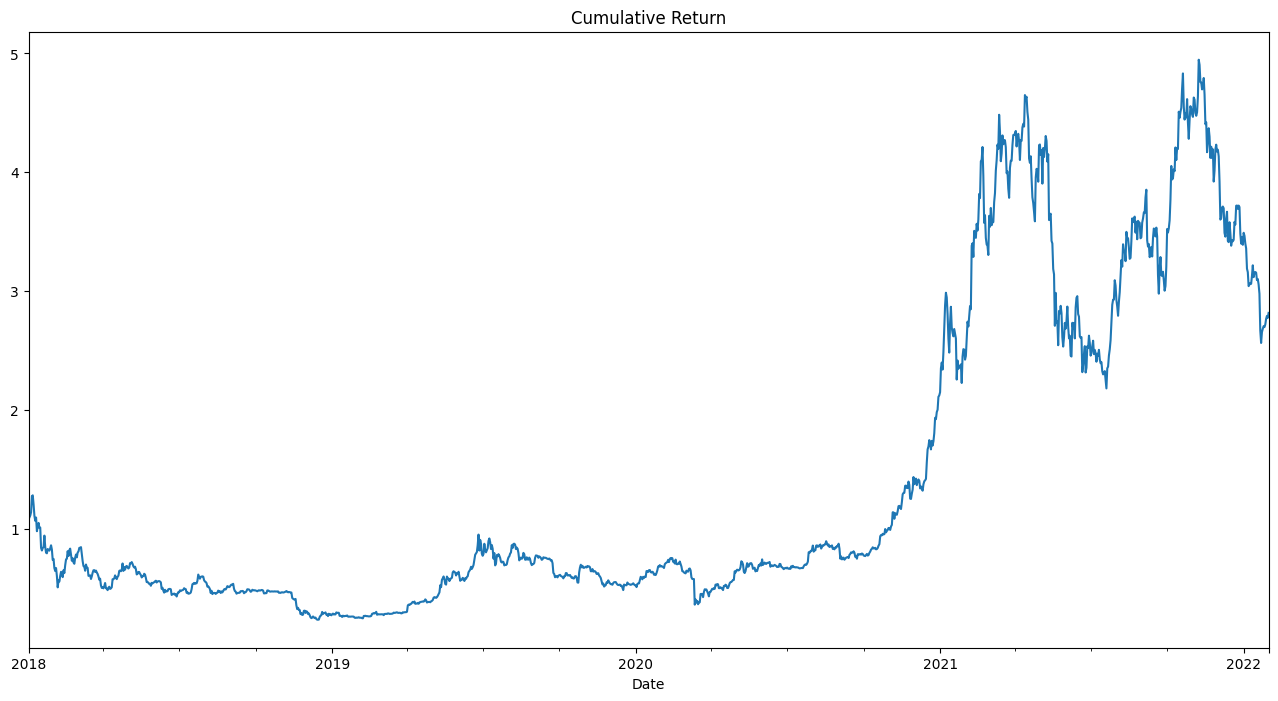

In [14]:
data['Cumulative Return'].plot(label='BTC',figsize=(16,8),title='Cumulative Return')